# Pandas Basics

In this notebook we'll be talking about the `pandas` library, which simplifies many common data loading and manipulation functions.

While much of this processing can be using `numpy`, `pandas` significantly reduces the time and effort necessary for dataset manipulation.

In this notebook we'll first go over `pandas` data structures as well as loading and saving capabilities. Then we will discuss dataset manipulation, including subset selection, column manipulation, and creating/aggregating new columns. Finally we'll talk about simple data visualization using `pandas`, which is actually built into the library.


# 1. Imports

This time we'll import `numpy` as per for data generation, and we'll also import the `pandas` library.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None) # changing settings so we print everything in our dataframes.
#print("\n".join(pd.__dir__())) # shows available objects, functions and submodules. Uncomment and execute to see full list.

## 2. `pandas` Data Structures
The `DataFrame` object is the base object that we manipulate in `pandas` when it comes to loading and clearing datasets, but there's also another base object that is quite useful in the library.

The `Series` object is an array like object that often represents one row or column within a `DataFrame`. The can be created an manipulated alone, or used in conjuction with the dataframe. It can also be manipulated in ways similar to the numpy array Lets get into some simple examples:

### Creating a series from a list or numpy array and manipulating it like an array

In [ ]:
series = pd.Series([1, 2, 3, 4, 5])
print(series, series ** 2, np.sum(series), sep='\n')

0    1
1    2
2    3
3    4
4    5
dtype: int64
0     1
1     4
2     9
3    16
4    25
dtype: int64
15


In [ ]:
series = pd.Series(np.random.randn(5))
print(series, series ** 2, np.sum(series), sep='\n')

0    0.103664
1   -1.827809
2    0.208953
3    0.391719
4    0.375120
dtype: float64
0    0.010746
1    3.340884
2    0.043661
3    0.153444
4    0.140715
dtype: float64
-0.7483522252730928


### Creating a dataframe from a series



In [ ]:
series_list = {
  'col_{}'.format(i): pd.Series(np.random.randn(5)) for i in range(5)
}
print(series_list)

df = pd.DataFrame(data=series_list)
print(df)

{'col_0': 0   -0.946818
1    0.069128
2   -1.382536
3    0.595900
4   -1.587448
dtype: float64, 'col_1': 0   -0.568587
1   -0.419540
2   -1.318906
3    1.242591
4   -0.496685
dtype: float64, 'col_2': 0   -0.156138
1   -0.071825
2   -0.848958
3   -1.266568
4    0.454908
dtype: float64, 'col_3': 0   -0.129684
1    0.618978
2   -1.419520
3    1.330801
4   -1.104949
dtype: float64, 'col_4': 0    0.026159
1    0.210070
2   -0.066269
3    0.496374
4    0.182656
dtype: float64}
      col_0     col_1     col_2     col_3     col_4
0 -0.946818 -0.568587 -0.156138 -0.129684  0.026159
1  0.069128 -0.419540 -0.071825  0.618978  0.210070
2 -1.382536 -1.318906 -0.848958 -1.419520 -0.066269
3  0.595900  1.242591 -1.266568  1.330801  0.496374
4 -1.587448 -0.496685  0.454908 -1.104949  0.182656


We see that the dataframe acts much like a matrix, and the series acts like individual columns within the matrix. We can index any individual column or row in the dataframe using the `df.loc` and indexing capabilities, which will return a `Series`. If we select multiple columns, that will result in another `DataFrame`. 

Also note that operations performed on the resulting objects will not affect the original dataframe.

In [ ]:
col1 = df['col_1']
col12 = df[['col_1', 'col_2']]
col12 *= 2
print(col1, col12, type(col1), type(col12), sep='\n') 
print(df)# dataframe is preserved

0   -0.568587
1   -0.419540
2   -1.318906
3    1.242591
4   -0.496685
Name: col_1, dtype: float64
      col_1     col_2
0 -1.137174 -0.312276
1 -0.839080 -0.143650
2 -2.637812 -1.697916
3  2.485182 -2.533136
4 -0.993371  0.909816
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
      col_0     col_1     col_2     col_3     col_4
0 -0.946818 -0.568587 -0.156138 -0.129684  0.026159
1  0.069128 -0.419540 -0.071825  0.618978  0.210070
2 -1.382536 -1.318906 -0.848958 -1.419520 -0.066269
3  0.595900  1.242591 -1.266568  1.330801  0.496374
4 -1.587448 -0.496685  0.454908 -1.104949  0.182656


In [ ]:
row1 = df.loc[1]
print(row1); row1 = row1 * 2; print(row1)
print(df) # original dataframe preserved

col_0    0.069128
col_1   -0.419540
col_2   -0.071825
col_3    0.618978
col_4    0.210070
Name: 1, dtype: float64
col_0    0.138255
col_1   -0.839080
col_2   -0.143650
col_3    1.237957
col_4    0.420141
Name: 1, dtype: float64
      col_0     col_1     col_2     col_3     col_4
0 -0.946818 -0.568587 -0.156138 -0.129684  0.026159
1  0.069128 -0.419540 -0.071825  0.618978  0.210070
2 -1.382536 -1.318906 -0.848958 -1.419520 -0.066269
3  0.595900  1.242591 -1.266568  1.330801  0.496374
4 -1.587448 -0.496685  0.454908 -1.104949  0.182656


Its often better to load `DataFrames` from data stored on disk. The pandas library has these functions available for loading data, but what we care about the most is `read_table` and `read_csv`, which allow us to read text files separated by whitespace or commas/newlines.(Not mentioned in this list are built-in csv writing functions for dataframes such as `Dataframe.to_csv`, which are also useful):

#### PICKLE
`read_pickle(filepath_or_buffer[, …])` Load pickled pandas object (or any object) from file.

#### FLAT FILES
`read_table(filepath_or_buffer[, sep, …])` Read general delimited file into DataFrame.

`read_csv(filepath_or_buffer[, sep, …])` Read a comma-separated values (csv) file into DataFrame.

`read_fwf(filepath_or_buffer[, colspecs, …])` Read a table of fixed-width formatted lines into DataFrame.

#### CLIPBOARD
`read_clipboard([sep])` Read text from clipboard and pass to read_csv.

#### EXCEL
`read_excel(io[, sheet_name, header, names, …])` Read an Excel file into a pandas DataFrame.

`ExcelFile.parse([sheet_name, header, names, …])` Parse specified sheet(s) into a DataFrame.

`ExcelWriter(path[, engine])` Class for writing DataFrame objects into excel sheets.

#### JSON
`read_json([path_or_buf, orient, typ, dtype, …])` Convert a JSON string to pandas object.

`json_normalize(data[, record_path, meta, …])` Normalize semi-structured JSON data into a flat table.

`build_table_schema(data[, index, …])` Create a Table schema from data.

####HTML
`read_html(io[, match, flavor, header, …])` Read HTML tables into a list of DataFrame objects.

####HDFStore: PyTables (HDF5)
`read_hdf(path_or_buf[, key, mode, errors, …])` Read from the store, close it if we opened it.

`HDFStore.put(key, value[, format, index, …])` Store object in HDFStore.

`HDFStore.append(key, value[, format, axes, …])` Append to Table in file.

`HDFStore.get(key)` Retrieve pandas object stored in file.

`HDFStore.select(key[, where, start, stop, …])` Retrieve pandas object stored in file, optionally based on where criteria.

`HDFStore.info()` Print detailed information on the store.

`HDFStore.keys([include])` Return a list of keys corresponding to objects stored in HDFStore.

`HDFStore.groups()` Return a list of all the top-level nodes.

`HDFStore.walk([where])` Walk the pytables group hierarchy for pandas objects.

#### Feather
`read_feather(path[, columns, use_threads, …])` Load a feather-format object from the file path.

#### Parquet
`read_parquet(path[, engine, columns, …])` Load a parquet object from the file path, returning a DataFrame.

#### ORC
`read_orc(path[, columns])` Load an ORC object from the file path, returning a DataFrame.

#### SAS
`read_sas(filepath_or_buffer[, format, …])` Read SAS files stored as either XPORT or SAS7BDAT format files.

#### SPSS
`read_spss(path[, usecols, convert_categoricals])` Load an SPSS file from the file path, returning a DataFrame.

#### SQL
`read_sql_table(table_name, con[, schema, …])` Read SQL database table into a DataFrame.

`read_sql_query(sql, con[, index_col, …])` Read SQL query into a DataFrame.

`read_sql(sql, con[, index_col, …])` Read SQL query or database table into a DataFrame.

#### Google BigQuery
`read_gbq(query[, project_id, index_col, …])` Load data from Google BigQuery.

#### STATA
`read_stata(filepath_or_buffer[, …])` Read Stata file into DataFrame.

`StataReader.data_label` Return data label of Stata file.

`StataReader.value_labels()` Return a dict, associating each variable name a dict, associating each value its corresponding label.

`StataReader.variable_labels()` Return variable labels as a dict, associating each variable name with corresponding label.

`StataWriter.write_file()`



We can also save a dataframe correctly using he `to_csv` function. There are also a few other dataframe-level functions for data writing.

### `DataFrame` writing functions
`DataFrame.to_parquet([path, engine, …])` Write a DataFrame to the binary parquet format.

`DataFrame.to_pickle(path[, compression, …])` Pickle (serialize) object to file.

`DataFrame.to_csv([path_or_buf, sep, na_rep, …])` Write object to a comma-separated values (csv) file.

`DataFrame.to_hdf(path_or_buf, key[, mode, …])` Write the contained data to an HDF5 file using HDFStore.

`DataFrame.to_sql(name, con[, schema, …])` Write records stored in a DataFrame to a SQL database.

`DataFrame.to_dict([orient, into])` Convert the DataFrame to a dictionary.

`DataFrame.to_excel(excel_writer[, …])` Write object to an Excel sheet.

`DataFrame.to_json([path_or_buf, orient, …])` Convert the object to a JSON string.

`DataFrame.to_html([buf, columns, col_space, …])` Render a DataFrame as an HTML table.

`DataFrame.to_feather(path, **kwargs)` Write a DataFrame to the binary Feather format.

`DataFrame.to_latex([buf, columns, …])` Render object to a LaTeX tabular, longtable, or nested table/tabular.

`DataFrame.to_stata(path[, convert_dates, …])` Export DataFrame object to Stata dta format.

`DataFrame.to_gbq(destination_table[, …])` Write a DataFrame to a Google BigQuery table.

`DataFrame.to_records([index, column_dtypes, …])` Convert DataFrame to a NumPy record array.

`DataFrame.to_string([buf, columns, …])` Render a DataFrame to a console-friendly tabular output.

`DataFrame.to_clipboard([excel, sep])` Copy object to the system clipboard.

`DataFrame.to_markdown([buf, mode, index, …])` Print DataFrame in Markdown-friendly format.


Lets load a dataframe.
We will be using data from NBA injuries from 2010 to 2018 (https://www.kaggle.com/ghopkins/nba-injuries-2010-2018)

In [ ]:
! gdown --output nba_injuries.csv https://drive.google.com/uc?id=1GiDcV4WeLs9rEo-6ZODKbx1c9oQU31aU
# This will download the nba injuries csv from google drive.

Downloading...
From: https://drive.google.com/uc?id=1GiDcV4WeLs9rEo-6ZODKbx1c9oQU31aU
To: /content/nba_injuries.csv
100% 1.60M/1.60M [00:00<00:00, 103MB/s]


Now lets read this csv file and take a look:

In [ ]:
nba_df = pd.read_csv('/content/nba_injuries.csv')
print(nba_df.columns, nba_df.iloc[:5], sep='\n')

Index(['Date', 'Team', 'Acquired', 'Relinquished', 'Notes'], dtype='object')
         Date     Team Acquired   Relinquished  \
0  2010-10-03    Bulls      NaN  Carlos Boozer   
1  2010-10-06  Pistons      NaN  Jonas Jerebko   
2  2010-10-06  Pistons      NaN  Terrico White   
3  2010-10-08  Blazers      NaN     Jeff Ayres   
4  2010-10-08     Nets      NaN    Troy Murphy   

                                               Notes  
0  fractured bone in right pinky finger (out inde...  
1      torn right Achilles tendon (out indefinitely)  
2  broken fifth metatarsal in right foot (out ind...  
3          torn ACL in right knee (out indefinitely)  
4             strained lower back (out indefinitely)  


# 2. Dataframe Manipulation

In this dataframe, we see that the players occur at the 'Acquired' and 'Relinquished' columns:

In [ ]:
print(nba_df[['Acquired', 'Relinquished']].iloc[-10:]) # print last 10 items

           Acquired    Relinquished
27095           NaN  Tyson Chandler
27096           NaN  Romeo Langford
27097           NaN  Romeo Langford
27098           NaN    Gabe Vincent
27099           NaN     Bam Adebayo
27100  Dion Waiters             NaN
27101           NaN     Bam Adebayo
27102           NaN    Goran Dragic
27103   Chris Silva             NaN
27104   Bam Adebayo             NaN


Lets show an example of dataframe manipulation. We want to filter any rows `NaNs`, and we know that a single entry will not have both set, so we will do this by setting the `NaNs` to empty strings and adding the columns into a new column:

In [ ]:
nba_df["Acquired"][nba_df['Acquired'].isnull()] = ""
nba_df["Relinquished"][nba_df['Relinquished'].isnull()] = ""
nba_df['Name'] = nba_df['Acquired'] + nba_df['Relinquished']
nba_df = nba_df[[c for c in nba_df.columns if c not in ['Acquired', 'Relinquished']]]
print(nba_df.loc[:5])

         Date     Team                                              Notes  \
0  2010-10-03    Bulls  fractured bone in right pinky finger (out inde...   
1  2010-10-06  Pistons      torn right Achilles tendon (out indefinitely)   
2  2010-10-06  Pistons  broken fifth metatarsal in right foot (out ind...   
3  2010-10-08  Blazers          torn ACL in right knee (out indefinitely)   
4  2010-10-08     Nets             strained lower back (out indefinitely)   
5  2010-10-08  Pistons       surgery to repair torn right Achilles tendon   

            Name  
0  Carlos Boozer  
1  Jonas Jerebko  
2  Terrico White  
3     Jeff Ayres  
4    Troy Murphy  
5  Jonas Jerebko  


Lets do something different this time. I want to only look at the players with the most entries in this dataset, say top 10. We will first count the occurrences of names by the `.value_counts()` operator that acts on a series, and then we will sort their values and get the top 10 using the `.head()` function:

In [ ]:
top_10_players = nba_df['Name'].value_counts().sort_values(ascending=False).head(10)
top_10_players = pd.DataFrame(top_10_players)
print(top_10_players['Name'], type(top_10_players), top_10_players.sum(), sep='\n')

Kevin Love          139
Dwyane Wade         132
Eric Gordon         127
 Tony Parker        126
Derrick Rose        124
Manu Ginobili       124
Kawhi Leonard       118
Chandler Parsons    115
Kyrie Irving        112
Nene Hilario        108
Name: Name, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Name    1225
dtype: int64


We can also index our original to select only players in this category:

In [ ]:
nba_df_top10 = nba_df[nba_df['Name'].isin(top_10_players.index.tolist())]
print(nba_df_top10.iloc[:20], len(nba_df_top10), sep='\n')

            Date      Team                                   Notes  \
165   2010-11-03   Nuggets               strained left groin (DNP)   
186   2010-11-05   Nuggets               strained left groin (DNP)   
200   2010-11-06   Nuggets               strained left groin (DNP)   
228   2010-11-09  Clippers  placed on IL with left shoulder injury   
263   2010-11-10  Clippers                       activated from IL   
264   2010-11-10  Clippers                sore left shoulder (DNP)   
385   2010-11-20      Heat   placed on IL with sprained left wrist   
403   2010-11-22      Heat                       activated from IL   
445   2010-11-26     Bulls             placed on IL with sore neck   
464   2010-11-27     Bulls                       activated from IL   
848   2010-12-23      Heat        placed on IL with sore left knee   
862   2010-12-25      Heat                       activated from IL   
936   2010-12-29   Nuggets                    sore hamstring (DNP)   
1280  2011-01-22    

The first method we manipulated the dataframe directly by joining two columns, while in the second we extracted the data into a different dataset, which allowed us to manipulate the data. 

This usage highlights manipulation using both `DataFrames` and `Series`. Below is a summary of the manipulation functions available in both objeects. Many of them are the same accoss the two objects, and include common analysis and aggregation functions. 

### `pandas.Series`

`abs()` Return a Series/DataFrame with absolute numeric value of each element.

`add(other[, level, fill_value, axis])` Return Addition of series and other, element-wise (binary operator add).

`add_prefix(prefix)` Prefix labels with string prefix.

`add_suffix(suffix)` Suffix labels with string suffix.

`agg([func, axis])` Aggregate using one or more operations over the specified axis.

`aggregate([func, axis])` Aggregate using one or more operations over the specified axis.

`align(other[, join, axis, level, copy, …])` Align two objects on their axes with the specified join method.

`all([axis, bool_only, skipna, level])` Return whether all elements are True, potentially over an axis.

`any([axis, bool_only, skipna, level])` Return whether any element is True, potentially over an axis.

`append(to_append[, ignore_index, …])` Concatenate two or more Series.

`apply(func[, convert_dtype, args])` Invoke function on values of Series.

`argmax([axis, skipna])` Return int position of the largest value in the Series.

`argmin([axis, skipna])` Return int position of the smallest value in the Series.

`argsort([axis, kind, order])` Return the integer indices that would sort the Series values.

`asfreq(freq[, method, how, normalize, …])` Convert TimeSeries to specified frequency.

`asof(where[, subset])` Return the last row(s) without any NaNs before where.

`astype(dtype[, copy, errors])` Cast a pandas object to a specified dtype dtype.

`at_time(time[, asof, axis])` Select values at particular time of day (e.g., 9:30AM).

`autocorr([lag])` Compute the lag-N autocorrelation.

`backfill([axis, inplace, limit, downcast])` Synonym for DataFrame.fillna() with method='bfill'.

`between(left, right[, inclusive])` Return boolean Series equivalent to left <= series <= right.

`between_time(start_time, end_time[, …])` Select values between particular times of the day (e.g., 9:00-9:30 AM).

`bfill([axis, inplace, limit, downcast])` Synonym for DataFrame.fillna() with method='bfill'.

`bool()` Return the bool of a single element Series or DataFrame.

`cat` alias of pandas.core.arrays.categorical.CategoricalAccessor

`clip([lower, upper, axis, inplace])` Trim values at input threshold(s).

`combine(other, func[, fill_value])` Combine the Series with a Series or scalar according to func.

`combine_first(other)` Combine Series values, choosing the calling Series’s values first.

`compare(other[, align_axis, keep_shape, …])` Compare to another Series and show the differences.

`convert_dtypes([infer_objects, …])` Convert columns to best possible dtypes using dtypes supporting pd.NA.

`copy([deep])` Make a copy of this object’s indices and data.

`corr(other[, method, min_periods])` Compute correlation with other Series, excluding missing values.

`count([level])` Return number of non-NA/null observations in the Series.

`cov(other[, min_periods, ddof])` Compute covariance with Series, excluding missing values.

`cummax([axis, skipna])` Return cumulative maximum over a DataFrame or Series axis.

`cummin([axis, skipna])` Return cumulative minimum over a DataFrame or Series axis.

`cumprod([axis, skipna])` Return cumulative product over a DataFrame or Series axis.

`cumsum([axis, skipna])` Return cumulative sum over a DataFrame or Series axis.

`describe([percentiles, include, exclude, …])` Generate descriptive statistics.

`diff([periods])` First discrete difference of element.

`div(other[, level, fill_value, axis])` Return Floating division of series and other, element-wise (binary operator truediv).

`divide(other[, level, fill_value, axis])` Return Floating division of series and other, element-wise (binary operator truediv).

`divmod(other[, level, fill_value, axis])` Return Integer division and modulo of series and other, element-wise (binary operator divmod).

`dot(other)` Compute the dot product between the Series and the columns of other.

`drop([labels, axis, index, columns, level, …])` Return Series with specified index labels removed.

`drop_duplicates([keep, inplace])` Return Series with duplicate values removed.

`droplevel(level[, axis])` Return DataFrame with requested index / column level(s) removed.

`dropna([axis, inplace, how])` Return a new Series with missing values removed.

`dt` alias of pandas.core.indexes.accessors.CombinedDatetimelikeProperties

`duplicated([keep])` Indicate duplicate Series values.

`eq(other[, level, fill_value, axis])` Return Equal to of series and other, element-wise (binary operator eq).

`equals(other)` Test whether two objects contain the same elements.

`ewm([com, span, halflife, alpha, …])` Provide exponential weighted (EW) functions.

`expanding([min_periods, center, axis])` Provide expanding transformations.

`explode([ignore_index])` Transform each element of a list-like to a row.

`factorize([sort, na_sentinel])` Encode the object as an enumerated type or categorical variable.

`ffill([axis, inplace, limit, downcast])` Synonym for DataFrame.fillna() with method='ffill'.

`fillna([value, method, axis, inplace, …])` Fill NA/NaN values using the specified method.

`filter([items, like, regex, axis])` Subset the dataframe rows or columns according to the specified index labels.

`first(offset)` Select initial periods of time series data based on a date offset.

`first_valid_index()` Return index for first non-NA/null value.

`floordiv(other[, level, fill_value, axis])` Return Integer division of series and other, element-wise (binary operator floordiv).

`ge(other[, level, fill_value, axis])` Return Greater than or equal to of series and other, element-wise (binary operator ge).

`get(key[, default])` Get item from object for given key (ex: DataFrame column).

`groupby([by, axis, level, as_index, sort, …])` Group Series using a mapper or by a Series of columns.

`gt(other[, level, fill_value, axis])` Return Greater than of series and other, element-wise (binary operator gt).

`head([n])` Return the first n rows.

`hist([by, ax, grid, xlabelsize, xrot, …])` Draw histogram of the input series using matplotlib.

`idxmax([axis, skipna])` Return the row label of the maximum value.

`idxmin([axis, skipna])` Return the row label of the minimum value.

`infer_objects()` Attempt to infer better dtypes for object columns.

`interpolate([method, axis, limit, inplace, …])` Fill NaN values using an interpolation method.

`isin(values)` Whether elements in Series are contained in values.

`isna()` Detect missing values.

`isnull()` Detect missing values.

`item()` Return the first element of the underlying data as a Python scalar.

`items()` Lazily iterate over (index, value) tuples.

`iteritems()` Lazily iterate over (index, value) tuples.

`keys()` Return alias for index.

`kurt([axis, skipna, level, numeric_only])` Return unbiased kurtosis over requested axis.

`kurtosis([axis, skipna, level, numeric_only])` Return unbiased kurtosis over requested axis.

`last(offset)` Select final periods of time series data based on a date offset.

`last_valid_index()` Return index for last non-NA/null value.

`le(other[, level, fill_value, axis])` Return Less than or equal to of series and other, element-wise (binary operator le).

`lt(other[, level, fill_value, axis])` Return Less than of series and other, element-wise (binary operator lt).

`mad([axis, skipna, level])` Return the mean absolute deviation of the values over the requested axis.

`map(arg[, na_action])` Map values of Series according to input correspondence.

`mask(cond[, other, inplace, axis, level, …])` Replace values where the condition is True.

`max([axis, skipna, level, numeric_only])` Return the maximum of the values over the requested axis.

`mean([axis, skipna, level, numeric_only])` Return the mean of the values over the requested axis.

`median([axis, skipna, level, numeric_only])` Return the median of the values over the requested axis.

`memory_usage([index, deep])` Return the memory usage of the Series.

`min([axis, skipna, level, numeric_only])` Return the minimum of the values over the requested axis.

`mod(other[, level, fill_value, axis])` Return Modulo of series and other, element-wise (binary operator mod).

`mode([dropna])` Return the mode(s) of the Series.

`mul(other[, level, fill_value, axis])` Return Multiplication of series and other, element-wise (binary operator mul).

`multiply(other[, level, fill_value, axis])` Return Multiplication of series and other, element-wise (binary operator mul).

`ne(other[, level, fill_value, axis])` Return Not equal to of series and other, element-wise (binary operator ne).

`nlargest([n, keep])` Return the largest n elements.

`notna()` Detect existing (non-missing) values.

`notnull()` Detect existing (non-missing) values.

`nsmallest([n, keep])` Return the smallest n elements.

`nunique([dropna])` Return number of unique elements in the object.

`pad([axis, inplace, limit, downcast])` Synonym for DataFrame.fillna() with method='ffill'.

`pct_change([periods, fill_method, limit, freq])` Percentage change between the current and a prior element.

`pipe(func, *args, **kwargs)` Apply func(self, *args, **kwargs).

`plot` alias of pandas.plotting._core.PlotAccessor

`pop(item)` Return item and drops from series.

`pow(other[, level, fill_value, axis])` Return Exponential power of series and other, element-wise (binary operator pow).

`prod([axis, skipna, level, numeric_only, …])` Return the product of the values over the requested axis.

`product([axis, skipna, level, numeric_only, …])` Return the product of the values over the requested axis.

`quantile([q, interpolation])` Return value at the given quantile.

`radd(other[, level, fill_value, axis])` Return Addition of series and other, element-wise (binary operator radd).

`rank([axis, method, numeric_only, …])` Compute numerical data ranks (1 through n) along axis.

`ravel([order])` Return the flattened underlying data as an ndarray.

`rdiv(other[, level, fill_value, axis])` Return Floating division of series and other, element-wise (binary operator rtruediv).

`rdivmod(other[, level, fill_value, axis])` Return Integer division and modulo of series and other, element-wise (binary operator rdivmod).

`reindex([index])` Conform Series to new index with optional filling logic.

`reindex_like(other[, method, copy, limit, …])` Return an object with matching indices as other object.

`rename([index, axis, copy, inplace, level, …])` Alter Series index labels or name.

`rename_axis([mapper, index, columns, axis, …])` Set the name of the axis for the index or columns.

`reorder_levels(order)` Rearrange index levels using input order.

`repeat(repeats[, axis])` Repeat elements of a Series.

`replace([to_replace, value, inplace, limit, …])` Replace values given in to_replace with value.

`resample(rule[, axis, closed, label, …])` Resample time-series data.

`reset_index([level, drop, name, inplace])` Generate a new DataFrame or Series with the index reset.

`rfloordiv(other[, level, fill_value, axis])` Return Integer division of series and other, element-wise (binary operator rfloordiv).

`rmod(other[, level, fill_value, axis])` Return Modulo of series and other, element-wise (binary operator rmod).

`rmul(other[, level, fill_value, axis])` Return Multiplication of series and other, element-wise (binary operator rmul).

`rolling(window[, min_periods, center, …])` Provide rolling window calculations.

`round([decimals])` Round each value in a Series to the given number of decimals.

`rpow(other[, level, fill_value, axis])` Return Exponential power of series and other, element-wise (binary operator rpow).

`rsub(other[, level, fill_value, axis])` Return Subtraction of series and other, element-wise (binary operator rsub).

`rtruediv(other[, level, fill_value, axis])` Return Floating division of series and other, element-wise (binary operator rtruediv).

`sample([n, frac, replace, weights, …])` Return a random sample of items from an axis of object.

`searchsorted(value[, side, sorter])` Find indices where elements should be inserted to maintain order.

`sem([axis, skipna, level, ddof, numeric_only])` Return unbiased standard error of the mean over requested axis.

`set_axis(labels[, axis, inplace])` Assign desired index to given axis.

`set_flags(*[, copy, allows_duplicate_labels])` Return a new object with updated flags.

`shift([periods, freq, axis, fill_value])` Shift index by desired number of periods with an optional time freq.

`skew([axis, skipna, level, numeric_only])` Return unbiased skew over requested axis.

`slice_shift([periods, axis])` (DEPRECATED) Equivalent to shift without copying data.

`sort_index([axis, level, ascending, …])` Sort Series by index labels.

`sort_values([axis, ascending, inplace, …])` Sort by the values.

`sparse` alias of pandas.core.arrays.sparse.accessor.SparseAccessor

`squeeze([axis])` Squeeze 1 dimensional axis objects into scalars.

`std([axis, skipna, level, ddof, numeric_only])` Return sample standard deviation over requested axis.

`str`alias of pandas.core.strings.accessor.StringMethods

`sub(other[, level, fill_value, axis])` Return Subtraction of series and other, element-wise (binary operator sub).

`subtract(other[, level, fill_value, axis])` Return Subtraction of series and other, element-wise (binary operator sub).

`sum([axis, skipna, level, numeric_only, …])` Return the sum of the values over the requested axis.

`swapaxes(axis1, axis2[, copy])` Interchange axes and swap values axes appropriately.

`swaplevel([i, j, copy])` Swap levels i and j in a MultiIndex.

`tail([n])` Return the last n rows.

`take(indices[, axis, is_copy])` Return the elements in the given positional indices along an axis.

`to_clipboard([excel, sep])` Copy object to the system clipboard.

`to_csv([path_or_buf, sep, na_rep, …])` Write object to a comma-separated values (csv) file.

`to_dict([into])` Convert Series to {label -> value} dict or dict-like object.

`to_excel(excel_writer[, sheet_name, na_rep, …])` Write object to an Excel sheet.

`to_frame([name])` Convert Series to DataFrame.

`to_hdf(path_or_buf, key[, mode, complevel, …])` Write the contained data to an HDF5 file using HDFStore.

`to_json([path_or_buf, orient, date_format, …])` Convert the object to a JSON string.

`to_latex([buf, columns, col_space, header, …])` Render object to a LaTeX tabular, longtable, or nested table/tabular.

`to_list()` Return a list of the values.

`to_markdown([buf, mode, index, storage_options])` Print Series in Markdown-friendly format.

`to_numpy([dtype, copy, na_value])` A NumPy ndarray representing the values in this Series or Index.

`to_period([freq, copy])` Convert Series from DatetimeIndex to PeriodIndex.

`to_pickle(path[, compression, protocol, …])` Pickle (serialize) object to file.

`to_sql(name, con[, schema, if_exists, …])` Write records stored in a DataFrame to a SQL database.

`to_string([buf, na_rep, float_format, …])` Render a string representation of the Series.

`to_timestamp([freq, how, copy])` Cast to DatetimeIndex of Timestamps, at beginning of period.

`to_xarray()` Return an xarray object from the pandas object.

`tolist()` Return a list of the values.

`transform(func[, axis])` Call func on self producing a Series with transformed values.

`transpose(*args, **kwargs)` Return the transpose, which is by definition self.

`truediv(other[, level, fill_value, axis])` Return Floating division of series and other, element-wise (binary operator truediv).

`truncate([before, after, axis, copy])` Truncate a Series or DataFrame before and after some index value.

`tshift([periods, freq, axis])` (DEPRECATED) Shift the time index, using the index’s frequency if available.

`tz_convert(tz[, axis, level, copy])` Convert tz-aware axis to target time zone.

`tz_localize(tz[, axis, level, copy, …])` Localize tz-naive index of a Series or DataFrame to target time zone.

`unique()` Return unique values of Series object.

`unstack([level, fill_value])` Unstack, also known as pivot, Series with MultiIndex to produce DataFrame.

`update(other)` Modify Series in place using values from passed Series.

`value_counts([normalize, sort, ascending, …])` Return a Series containing counts of unique values.

`var([axis, skipna, level, ddof, numeric_only])` Return unbiased variance over requested axis.

`view([dtype])` Create a new view of the Series.

`where(cond[, other, inplace, axis, level, …])` Replace values where the condition is False.

`xs(key[, axis, level, drop_level])` Return cross-section from the Series/DataFrame.


### `pandas.DataFrame`

`abs()` Return a Series/DataFrame with absolute numeric value of each element.

`add(other[, axis, level, fill_value])` Get Addition of dataframe and other, element-wise (binary operator add).

`add_prefix(prefix)` Prefix labels with string prefix.

`add_suffix(suffix)` Suffix labels with string suffix.

`agg([func, axis])` Aggregate using one or more operations over the specified axis.

`aggregate([func, axis])` Aggregate using one or more operations over the specified axis.

`align(other[, join, axis, level, copy, …])` Align two objects on their axes with the specified join method.

`all([axis, bool_only, skipna, level])` Return whether all elements are True, potentially over an axis.

`any([axis, bool_only, skipna, level])` Return whether any element is True, potentially over an axis.

`append(other[, ignore_index, …])` Append rows of other to the end of caller, returning a new object.

`apply(func[, axis, raw, result_type, args])` Apply a function along an axis of the DataFrame.

`applymap(func[, na_action])` Apply a function to a Dataframe elementwise.

`asfreq(freq[, method, how, normalize, …])` Convert TimeSeries to specified frequency.

`asof(where[, subset])` Return the last row(s)` without any NaNs before where.

`assign(**kwargs)` Assign new columns to a DataFrame.

`astype(dtype[, copy, errors])` Cast a pandas object to a specified dtype dtype.

`at_time(time[, asof, axis])` Select values at particular time of day (e.g., 9:30AM).

`backfill([axis, inplace, limit, downcast])` Synonym for DataFrame.fillna()` with method='bfill'.

`between_time(start_time, end_time[, …])` Select values between particular times of the day (e.g., 9:00-9:30 AM).

`bfill([axis, inplace, limit, downcast])` Synonym for DataFrame.fillna()` with method='bfill'.

`bool()` Return the bool of a single element Series or DataFrame.

`boxplot([column, by, ax, fontsize, rot, …])` Make a box plot from DataFrame columns.

`clip([lower, upper, axis, inplace])` Trim values at input threshold(s).

`combine(other, func[, fill_value, overwrite])` Perform column-wise combine with another DataFrame.

`combine_first(other)` Update null elements with value in the same location in other.

`compare(other[, align_axis, keep_shape, …])` Compare to another DataFrame and show the differences.

`convert_dtypes([infer_objects, …])` Convert columns to best possible dtypes using dtypes supporting pd.NA.

`copy([deep])` Make a copy of this object’s indices and data.

`corr([method, min_periods])` Compute pairwise correlation of columns, excluding NA/null values.

`corrwith(other[, axis, drop, method])` Compute pairwise correlation.

`count([axis, level, numeric_only])` Count non-NA cells for each column or row.

`cov([min_periods, ddof])` Compute pairwise covariance of columns, excluding NA/null values.

`cummax([axis, skipna])` Return cumulative maximum over a DataFrame or Series axis.

`cummin([axis, skipna])` Return cumulative minimum over a DataFrame or Series axis.

`cumprod([axis, skipna])` Return cumulative product over a DataFrame or Series axis.

`cumsum([axis, skipna])` Return cumulative sum over a DataFrame or Series axis.

`describe([percentiles, include, exclude, …])` Generate descriptive statistics.

`diff([periods, axis])` First discrete difference of element.

`div(other[, axis, level, fill_value])` Get Floating division of dataframe and other, element-wise (binary operator truediv).

`divide(other[, axis, level, fill_value])` Get Floating division of dataframe and other, element-wise (binary operator truediv).

`dot(other)` Compute the matrix multiplication between the DataFrame and other.

`drop([labels, axis, index, columns, level, …])` Drop specified labels from rows or columns.

`drop_duplicates([subset, keep, inplace, …])` Return DataFrame with duplicate rows removed.

`droplevel(level[, axis])` Return DataFrame with requested index / column level(s)` removed.

`dropna([axis, how, thresh, subset, inplace])` Remove missing values.

`duplicated([subset, keep])` Return boolean Series denoting duplicate rows.

`eq(other[, axis, level])` Get Equal to of dataframe and other, element-wise (binary operator eq).

`equals(other)` Test whether two objects contain the same elements.

`eval(expr[, inplace])` Evaluate a string describing operations on DataFrame columns.

`ewm([com, span, halflife, alpha, …])` Provide exponential weighted (EW)` functions.

`expanding([min_periods, center, axis])` Provide expanding transformations.

`explode(column[, ignore_index])` Transform each element of a list-like to a row, replicating index values.

`ffill([axis, inplace, limit, downcast])` Synonym for DataFrame.fillna()` with method='ffill'.

`fillna([value, method, axis, inplace, …])` Fill NA/NaN values using the specified method.

`filter([items, like, regex, axis])` Subset the dataframe rows or columns according to the specified index labels.

`first(offset)` Select initial periods of time series data based on a date offset.

`first_valid_index()` Return index for first non-NA/null value.

`floordiv(other[, axis, level, fill_value])` Get Integer division of dataframe and other, element-wise (binary operator floordiv).

`from_dict(data[, orient, dtype, columns])` Construct DataFrame from dict of array-like or dicts.

`from_records(data[, index, exclude, …])` Convert structured or record ndarray to DataFrame.

`ge(other[, axis, level])` Get Greater than or equal to of dataframe and other, element-wise (binary operator ge).

`get(key[, default])` Get item from object for given key (ex: DataFrame column).

`groupby([by, axis, level, as_index, sort, …])` Group DataFrame using a mapper or by a Series of columns.

`gt(other[, axis, level])` Get Greater than of dataframe and other, element-wise (binary operator gt).

`head([n])` Return the first n rows.

`hist([column, by, grid, xlabelsize, xrot, …])` Make a histogram of the DataFrame’s.

`idxmax([axis, skipna])` Return index of first occurrence of maximum over requested axis.

`idxmin([axis, skipna])` Return index of first occurrence of minimum over requested axis.

`infer_objects()` Attempt to infer better dtypes for object columns.

`info([verbose, buf, max_cols, memory_usage, …])` Print a concise summary of a DataFrame.

`insert(loc, column, value[, allow_duplicates])` Insert column into DataFrame at specified location.

`interpolate([method, axis, limit, inplace, …])` Fill NaN values using an interpolation method.

`isin(values)` Whether each element in the DataFrame is contained in values.

`isna()` Detect missing values.

`isnull()` Detect missing values.

`items()` Iterate over (column name, Series)` pairs.

`iteritems()` Iterate over (column name, Series)` pairs.

`iterrows()` Iterate over DataFrame rows as (index, Series)` pairs.

`itertuples([index, name])` Iterate over DataFrame rows as namedtuples.

`join(other[, on, how, lsuffix, rsuffix, sort])` Join columns of another DataFrame.

`keys()` Get the ‘info axis’ (see Indexing for more).

`kurt([axis, skipna, level, numeric_only])` Return unbiased kurtosis over requested axis.

`kurtosis([axis, skipna, level, numeric_only])` Return unbiased kurtosis over requested axis.

`last(offset)` Select final periods of time series data based on a date offset.

`last_valid_index()` Return index for last non-NA/null value.

`le(other[, axis, level])` Get Less than or equal to of dataframe and other, element-wise (binary operator le).

`lookup(row_labels, col_labels)` (DEPRECATED)` Label-based “fancy indexing” function for DataFrame.

`lt(other[, axis, level])` Get Less than of dataframe and other, element-wise (binary operator lt).

`mad([axis, skipna, level])` Return the mean absolute deviation of the values over the requested axis.

`mask(cond[, other, inplace, axis, level, …])` Replace values where the condition is True.

`max([axis, skipna, level, numeric_only])` Return the maximum of the values over the requested axis.

`mean([axis, skipna, level, numeric_only])` Return the mean of the values over the requested axis.

`median([axis, skipna, level, numeric_only])` Return the median of the values over the requested axis.

`melt([id_vars, value_vars, var_name, …])` Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

`memory_usage([index, deep])` Return the memory usage of each column in bytes.

`merge(right[, how, on, left_on, right_on, …])` Merge DataFrame or named Series objects with a database-style join.

`min([axis, skipna, level, numeric_only])` Return the minimum of the values over the requested axis.

`mod(other[, axis, level, fill_value])` Get Modulo of dataframe and other, element-wise (binary operator mod).

`mode([axis, numeric_only, dropna])` Get the mode(s)` of each element along the selected axis.

`mul(other[, axis, level, fill_value])` Get Multiplication of dataframe and other, element-wise (binary operator mul).

`multiply(other[, axis, level, fill_value])` Get Multiplication of dataframe and other, element-wise (binary operator mul).

`ne(other[, axis, level])` Get Not equal to of dataframe and other, element-wise (binary operator ne).

`nlargest(n, columns[, keep])` Return the first n rows ordered by columns in descending order.

`notna()` Detect existing (non-missing)` values.

`notnull()` Detect existing (non-missing)` values.

`nsmallest(n, columns[, keep])` Return the first n rows ordered by columns in ascending order.

`nunique([axis, dropna])` Count distinct observations over requested axis.

`pad([axis, inplace, limit, downcast])` Synonym for DataFrame.fillna()` with method='ffill'.

`pct_change([periods, fill_method, limit, freq])` Percentage change between the current and a prior element.

`pipe(func, *args, **kwargs)` Apply func(self, *args, **kwargs).

`pivot([index, columns, values])` Return reshaped DataFrame organized by given index / column values.

`pivot_table([values, index, columns, …])` Create a spreadsheet-style pivot table as a DataFrame.

`plot` alias of pandas.plotting._core.PlotAccessor

`pop(item)` Return item and drop from frame.

`pow(other[, axis, level, fill_value])` Get Exponential power of dataframe and other, element-wise (binary operator pow).

`prod([axis, skipna, level, numeric_only, …])` Return the product of the values over the requested axis.

`product([axis, skipna, level, numeric_only, …])` Return the product of the values over the requested axis.

`quantile([q, axis, numeric_only, interpolation])` Return values at the given quantile over requested axis.

`query(expr[, inplace])` Query the columns of a DataFrame with a boolean expression.

`radd(other[, axis, level, fill_value])` Get Addition of dataframe and other, element-wise (binary operator radd).

`rank([axis, method, numeric_only, …])` Compute numerical data ranks (1 through n)` along axis.

`rdiv(other[, axis, level, fill_value])` Get Floating division of dataframe and other, element-wise (binary operator rtruediv).

`reindex([labels, index, columns, axis, …])` Conform Series/DataFrame to new index with optional filling logic.

`reindex_like(other[, method, copy, limit, …])` Return an object with matching indices as other object.

`rename([mapper, index, columns, axis, copy, …])` Alter axes labels.

`rename_axis([mapper, index, columns, axis, …])` Set the name of the axis for the index or columns.

`reorder_levels(order[, axis])` Rearrange index levels using input order.

`replace([to_replace, value, inplace, limit, …])` Replace values given in to_replace with value.

`resample(rule[, axis, closed, label, …])` Resample time-series data.

`reset_index([level, drop, inplace, …])` Reset the index, or a level of it.

`rfloordiv(other[, axis, level, fill_value])` Get Integer division of dataframe and other, element-wise (binary operator rfloordiv).

`rmod(other[, axis, level, fill_value])` Get Modulo of dataframe and other, element-wise (binary operator rmod).

`rmul(other[, axis, level, fill_value])` Get Multiplication of dataframe and other, element-wise (binary operator rmul).

`rolling(window[, min_periods, center, …])` Provide rolling window calculations.

`round([decimals])` Round a DataFrame to a variable number of decimal places.

`rpow(other[, axis, level, fill_value])` Get Exponential power of dataframe and other, element-wise (binary operator rpow).

`rsub(other[, axis, level, fill_value])` Get Subtraction of dataframe and other, element-wise (binary operator rsub).

`rtruediv(other[, axis, level, fill_value])` Get Floating division of dataframe and other, element-wise (binary operator rtruediv).

`sample([n, frac, replace, weights, …])` Return a random sample of items from an axis of object.

`select_dtypes([include, exclude])` Return a subset of the DataFrame’s columns based on the column dtypes.

`sem([axis, skipna, level, ddof, numeric_only])` Return unbiased standard error of the mean over requested axis.

`set_axis(labels[, axis, inplace])` Assign desired index to given axis.

`set_flags(*[, copy, allows_duplicate_labels])` Return a new object with updated flags.

`set_index(keys[, drop, append, inplace, …])` Set the DataFrame index using existing columns.

`shift([periods, freq, axis, fill_value])` Shift index by desired number of periods with an optional time freq.

`skew([axis, skipna, level, numeric_only])` Return unbiased skew over requested axis.

`slice_shift([periods, axis])` (DEPRECATED)` Equivalent to shift without copying data.

`sort_index([axis, level, ascending, …])` Sort object by labels (along an axis).

`sort_values(by[, axis, ascending, inplace, …])` Sort by the values along either axis.

`sparse` alias of pandas.core.arrays.sparse.accessor.SparseFrameAccessor

`squeeze([axis])` Squeeze 1 dimensional axis objects into scalars.

`stack([level, dropna])` Stack the prescribed level(s)` from columns to index.

`std([axis, skipna, level, ddof, numeric_only])` Return sample standard deviation over requested axis.

`sub(other[, axis, level, fill_value])` Get Subtraction of dataframe and other, element-wise (binary operator sub).

`subtract(other[, axis, level, fill_value])` Get Subtraction of dataframe and other, element-wise (binary operator sub).

`sum([axis, skipna, level, numeric_only, …])` Return the sum of the values over the requested axis.

`swapaxes(axis1, axis2[, copy])` Interchange axes and swap values axes appropriately.

`swaplevel([i, j, axis])` Swap levels i and j in a MultiIndex on a particular axis.

`tail([n])` Return the last n rows.

`take(indices[, axis, is_copy])` Return the elements in the given positional indices along an axis.

`to_clipboard([excel, sep])` Copy object to the system clipboard.

`to_csv([path_or_buf, sep, na_rep, …])` Write object to a comma-separated values (csv)` file.

`to_dict([orient, into])` Convert the DataFrame to a dictionary.

`to_excel(excel_writer[, sheet_name, na_rep, …])` Write object to an Excel sheet.

`to_feather(path, **kwargs)` Write a DataFrame to the binary Feather format.

`to_gbq(destination_table[, project_id, …])` Write a DataFrame to a Google BigQuery table.

`to_hdf(path_or_buf, key[, mode, complevel, …])` Write the contained data to an HDF5 file using HDFStore.

`to_html([buf, columns, col_space, header, …])` Render a DataFrame as an HTML table.

`to_json([path_or_buf, orient, date_format, …])` Convert the object to a JSON string.

`to_latex([buf, columns, col_space, header, …])` Render object to a LaTeX tabular, longtable, or nested table/tabular.

`to_markdown([buf, mode, index, storage_options])` Print DataFrame in Markdown-friendly format.

`to_numpy([dtype, copy, na_value])` Convert the DataFrame to a NumPy array.

`to_parquet([path, engine, compression, …])` Write a DataFrame to the binary parquet format.

`to_period([freq, axis, copy])` Convert DataFrame from DatetimeIndex to PeriodIndex.

`to_pickle(path[, compression, protocol, …])` Pickle (serialize)` object to file.

`to_records([index, column_dtypes, index_dtypes])` Convert DataFrame to a NumPy record array.

`to_sql(name, con[, schema, if_exists, …])` Write records stored in a DataFrame to a SQL database.

`to_stata(path[, convert_dates, write_index, …])` Export DataFrame object to Stata dta format.

`to_string([buf, columns, col_space, header, …])` Render a DataFrame to a console-friendly tabular output.

`to_timestamp([freq, how, axis, copy])` Cast to DatetimeIndex of timestamps, at beginning of period.

`to_xarray()` Return an xarray object from the pandas object.

`transform(func[, axis])` Call func on self producing a DataFrame with transformed values.

`transpose(*args[, copy])` Transpose index and columns.

`truediv(other[, axis, level, fill_value])` Get Floating division of dataframe and other, element-wise (binary operator truediv).

`truncate([before, after, axis, copy])` Truncate a Series or DataFrame before and after some index value.

`tshift([periods, freq, axis])` (DEPRECATED)` Shift the time index, using the index’s frequency if available.

`tz_convert(tz[, axis, level, copy])` Convert tz-aware axis to target time zone.

`tz_localize(tz[, axis, level, copy, …])` Localize tz-naive index of a Series or DataFrame to target time zone.

`unstack([level, fill_value])` Pivot a level of the (necessarily hierarchical)` index labels.

`update(other[, join, overwrite, …])` Modify in place using non-NA values from another DataFrame.

`value_counts([subset, normalize, sort, …])` Return a Series containing counts of unique rows in the DataFrame.

`var([axis, skipna, level, ddof, numeric_only])` Return unbiased variance over requested axis.

`where(cond[, other, inplace, axis, level, …])` Replace values where the condition is False.

`xs(key[, axis, level, drop_level])` Return cross-section from the Series/DataFrame.


There are also module-wide functions that are helpful for manipulation, but many of them are similar to the Series/DataFrame functions.



Understanding your dataset processing goals is important before deciding what manipulation functiosn you need. Google is once again our best friend here.

# 3. `pandas` Data Visualization

We will lastly show a quick example of pandas data visualization. 

Pandas has some matplotlib plotting capabilities with the `DataFrame.plot` and `Series.plot` functions:


### `Series.plot`
`Series.plot([kind, ax, figsize, ….])` Series plotting accessor and method

`Series.plot.area([x, y])` Draw a stacked area plot.

`Series.plot.bar([x, y])` Vertical bar plot.

`Series.plot.barh([x, y])` Make a horizontal bar plot.

`Series.plot.box([by])` Make a box plot of the DataFrame columns.

`Series.plot.density([bw_method, ind])` Generate Kernel Density Estimate plot using Gaussian kernels.

`Series.plot.hist([by, bins])` Draw one histogram of the DataFrame’s columns.

`Series.plot.kde([bw_method, ind])` Generate Kernel Density Estimate plot using Gaussian kernels.

`Series.plot.line([x, y])` Plot Series or DataFrame as lines.

`Series.plot.pie(**kwargs)` Generate a pie plot.

`Series.hist([by, ax, grid, xlabelsize, …])` Draw histogram of the input series using matplotlib.


### `DataFrame.plot`
`DataFrame.plot([x, y, kind, ax, ….])` DataFrame plotting accessor and method

`DataFrame.plot.area([x, y])` Draw a stacked area plot.

`DataFrame.plot.bar([x, y])` Vertical bar plot.

`DataFrame.plot.barh([x, y])` Make a horizontal bar plot.

`DataFrame.plot.box([by])` Make a box plot of the DataFrame columns.

`DataFrame.plot.density([bw_method, ind])` Generate Kernel Density Estimate plot using Gaussian kernels.

`DataFrame.plot.hexbin(x, y[, C, …])` Generate a hexagonal binning plot.

`DataFrame.plot.hist([by, bins])` Draw one histogram of the DataFrame’s columns.

`DataFrame.plot.kde([bw_method, ind])` Generate Kernel Density Estimate plot using Gaussian kernels.

`DataFrame.plot.line([x, y])` Plot Series or DataFrame as lines.

`DataFrame.plot.pie(**kwargs)` Generate a pie plot.

`DataFrame.plot.scatter(x, y[, s, c])` Create a scatter plot with varying marker point size and color.

`DataFrame.boxplot([column, by, ax, …])` Make a box plot from DataFrame columns.

`DataFrame.hist([column, by, grid, …])` Make a histogram of the DataFrame’s.

Lets do some visualization on the injury data:

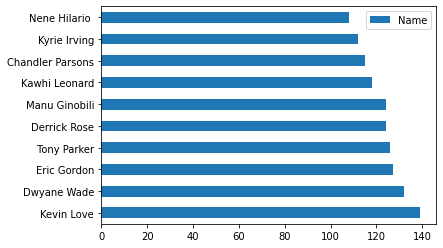

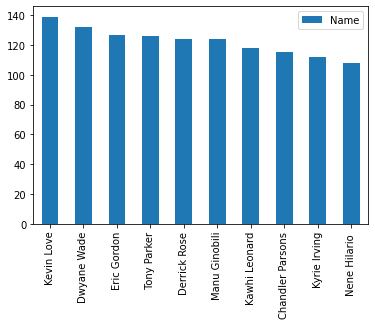

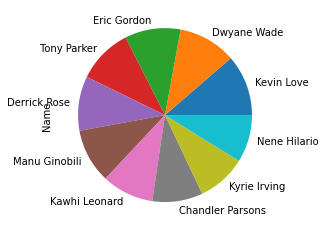

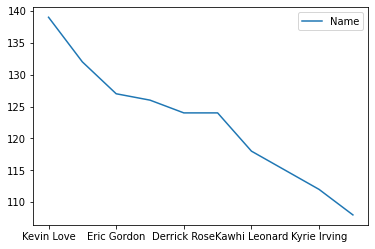

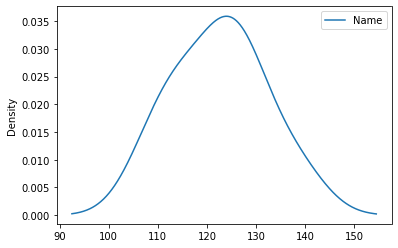

In [ ]:
top_10_players.plot(kind='barh')
top_10_players.plot(kind='bar')
top_10_players.plot(kind='pie', subplots=True, legend=False)
top_10_players.plot(kind='line')
top_10_players.plot(kind='density')




There is also a pandas plotting submodule that provides useful functions, but its not really necessary for simple things.


### `pandas.plotting`:

`andrews_curves(frame, class_column[, ax, …])` Generate a matplotlib plot of Andrews curves, for visualising clusters of multivariate data.

`autocorrelation_plot(series[, ax])` Autocorrelation plot for time series.

`bootstrap_plot(series[, fig, size, samples])` Bootstrap plot on mean, median and mid-range statistics.

`boxplot(data[, column, by, ax, fontsize, …])` Make a box plot from DataFrame columns.

`deregister_matplotlib_converters()` Remove pandas formatters and converters.

`lag_plot(series[, lag, ax])` Lag plot for time series.

`parallel_coordinates(frame, class_column[, …])` Parallel coordinates plotting.

`plot_params` Stores pandas plotting options.

`radviz(frame, class_column[, ax, color, …])` Plot a multidimensional dataset in 2D.

`register_matplotlib_converters()` Register pandas formatters and converters with matplotlib.

`scatter_matrix(frame[, alpha, figsize, ax, …])` Draw a matrix of scatter plots.

`table(ax, data[, rowLabels, colLabels])` Helper function to convert DataFrame and Series to matplotlib.table.



As you can see, its pretty simple. Definitely check out the full api documentation for pandas plotting generally and for the `Series` and `Dataframe` objects for information on the plotting capablities.

## 4. Additional Examples, Tutorials and Extended Learning

Depending on your application, `pandas` may provide the tools you need.

Check out the `pandas` reference [here](https://numpy.org/doc/stable/), and some useful tutorials [here](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) and [here](https://pandas.pydata.org/docs/user_guide/10min.html#min).

[Next time,](https://www.youtube.com/channel/UCvVAxOBEAMgu7WwTcFptt-w?sub_confirmation=1) we're going to talk about Virtual Environments, which can save you from the pits of dependency hell.